# This is going to be a 2D attempt at making the serotonin transport thing work

In [1]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
from collections import namedtuple
import scipy
from scipy import integrate
import scipy.special as special
import numpy as np
import pandas as pd

In [2]:
concentration = np.array([[5,0,0,0,0]])
concentration.shape

(1, 5)

Okay, what I'm trying to do is set up euler's method for each of these different ways

We have the following modes of transport:
* Diffusion
* Adsorbtion 
* Reaction

The overall mass balance is represented by the following equation:

$ \frac{\partial}{\partial t}(\rho c_i) + \frac{1}{r}\frac{\partial}{\partial r}(r \rho v_r c_i) + \frac{\partial}{\partial z}(\rho v_z c_i) = \frac{1}{r} \frac{\partial}{\partial r}(r \rho D \frac{\partial c_i}{\partial r}) + \frac{\partial}{\partial z}(\rho D \frac{\partial c_i}{\partial z}) + R_i$

We can make the following assumptions:

* No accumulation
* No change in density
* No velocity in the $r$ direction
* No change in velocity in the $z$ direction

Therefore the differiential equation expands as follows:

$ \rho v_z \frac{\partial c_i}{\partial z} = \rho D \frac{1}{r} (r \frac{\partial^2 c_i}{\partial r^2} + \frac{\partial c_i}{\partial r}) + \rho D \frac{\partial^2 c_i}{\partial z^2} + R_i $

For the previous equation we have a variety of ways to approximate each derivative:

$ \frac{ \partial y } {\partial x} = \frac{y_{n} - y_{n-1}}{\Delta x}$

$ \frac{ \partial y } {\partial x} = \frac{y_{n+1} - y_{n-1}}{2 \Delta x}$

$ \frac{ \partial y } {\partial x} = \frac{y_{n-2} - 8 y_{n-1} - + 8 y_{n+1} - y_{n+2}}{12 \Delta x}$

$\frac{ \partial^2 y } {\partial x^2} = \frac{y_{n+1} - 2 y_n + y_{n-1}}{(\Delta x)^2}$




# Starting with Abdul

$ \rho {v_z} \frac{\partial C}{\partial z} = \rho D \frac{1}{r} (r \frac{\partial^2 C}{\partial r^2} + \frac{\partial C}{\partial r})+ \rho D \frac{\partial^2 C}{\partial z^2} \longrightarrow  $ Assuming no reaction

$- \rho D \frac{\partial^2 C}{\partial z^2} + \rho v_z \frac{\partial C}{\partial z} = \rho D \frac{1}{r} (r \frac{\partial^2 C}{\partial r^2} + \frac{\partial C}{\partial r})$

Assume $ \frac{\partial^2 C}{\partial z^2} $ is much smaller than $ \frac{\partial^2 C}{\partial z^2} $ and ignore axial conduction

$ {v_z}\frac{\partial C}{\partial z} = \frac{1}{r}\frac{\partial}{\partial r}({r}{D}\frac{\partial C}{\partial r}) $

Let $ {v_z} = {v_{max}}(1-(\frac{r}{R})^2) $

$ \frac{v_{max}}{D}(1-(\frac{r}{R})^2) \frac{\partial C}{\partial z} =  \frac{D}{r}\frac{\partial}{\partial r}({r}\frac{\partial C}{\partial r}) $

Introduce dimensionless variables
$ \xi = \frac{r}{R} $ and $ \zeta = \frac{zD}{R^2 v_{max}} $

$ (1-\xi ^2) \frac{\partial C}{\partial \zeta} = \frac{1}{\xi} \frac{\partial}{\partial \xi} (\xi \frac{\partial C}{\partial \xi}) $

Boundary Conditions:

$ C = C_{ao} \quad \zeta = 0 $

$ C = C_{w} \quad \xi = 1 $

$ \frac{\partial C}{\partial \xi} = 0 \quad \xi = 0 $




To ensure homogenous conditions in $ \xi$ domain

$ \theta = C - C_w $

so

$ (1-\xi ^2) \frac{\partial \theta}{\partial \zeta} = \frac{1}{\xi} \frac{\partial}{\partial \xi} (\xi \frac{\partial \theta}{\partial \xi}) $

and

$ \theta = C_{ao} - C_w \quad \zeta = 0 $

$ \theta = 0 \quad \xi = 1 $

$ \frac{\partial \theta}{\partial \xi} = 0 \quad \xi = 0 $


Propose $\theta(\xi,\zeta) = \varphi(\xi)Z(\zeta) $ and rearrange and separate variables

$ \frac{(1/\xi)(d/d \xi)(\xi(d\varphi/d\xi))}{[(a-\xi^2)\varphi]}=\frac{Z'}{Z}=-\lambda^2 $

Ensure $C - C_w = 0$  diminishes as $\varphi \rightarrow \infty$

$[1] \quad \frac{d}{d \xi}(\xi \frac{d \varphi}{d \xi}) + \lambda^2 \xi (1-\xi^2)\varphi = 0 $ 

$[2] \quad \frac{d Z}{d \zeta} + \lambda^2 Z = 0 $

Equation [1] is a Sturm-Liouville equation with

$ p(\xi)=\xi, \quad q(\xi)=0, \quad r(\xi)=\xi (1-\xi^2), \quad $ and $ \beta=\lambda^2$

and homogenous boundary conditions require

$\varphi'(0)=0, \quad \varphi(1)=0$

which are also Sturm-Liouville type, to ensure the solutions $\varphi_n$ and $\varphi_m$ are orthogonal with respect to $r(\xi)=\xi(1-\xi^2)$

The Graetz equation in the analysis of heat/mass transfer to fluids in laminar flow.


The Graetz polynomials generated by the solution to equation [1] by using method of Frobenius to $\varphi(\xi)=Gz(\xi,\lambda)$ to get... *will not actually show work for this*

$Gz(\xi,\lambda)=1-\frac{\lambda^2}{4}\xi^2 + \frac{\lambda^2}{16}(1+\frac{\lambda^2}{4})\xi^4+...$

combining the solutions for $Z(\zeta)$ and $\varphi$ gives for $\lambda \neq 0$

$\theta=AGz(\xi,\lambda)$exp$(-\lambda^2\zeta)$

The solution when $\lambda=0$ is $B$ln$\xi+C$ but ln$\xi$ is not finite at the center, $B = 0$ and the remaining solutions are now

$\theta=AGz(\xi,\lambda)$exp$(\lambda^2\zeta)+C$

For an infinetly long gut, it is obvious that $C \rightarrow C_w$ as $z \rightarrow \infty$ so $\theta \rightarrow 0$ as $\zeta \rightarrow \infty$

$\theta = AGz(\xi,\lambda)$exp$(-\lambda^2\zeta)$

Apply the wall condition, $\theta=0$ at $\xi=1$ to get

$Gz(1,\lambda)=0,\quad \xi=1$

$0=1-(\frac{\lambda^2}{4})+(\frac{\lambda^2}{16})(1+\frac{\lambda^2}{4})-...$

the general result being

$\theta(\xi,\zeta)=\sum_{n-1}^{\infty}A_n G z_n(\xi)$exp$(-\lambda^2 \zeta)$

Denote $Gz_n(\xi)$ as the eigenfunction $Gz_n(\xi,\lambda_n)$ and apply condition at the inlet

$(C_{ao} - C_w)=\sum_{n=1}^{\infty}A_n Gz_n(\xi)$

multiply both sides with the weighting function $r(\xi)=\xi (1-\xi^2)$ and by $Gz_m(\xi)$ where $n \neq m$ and integrate between 0 and 1 to get

$(C_{ao} - C_w)\int_{0}^{1} Gz_m(\xi)\xi (1-\xi^2) d\xi = \sum_{n=1}^{\infty}A_n \int_{0}^{1} Gz_n(\xi)Gz_m(\xi)\xi (1-\xi^2) d\xi $

Orthogonality conditions eliminate all terms except when $m=n$ within the summation, so solving for $A_n$

$A_n= \frac{(C_{ao}-C_w)\int_{0}^{1}Gz_n(\xi)\xi(1-\xi^2)d\xi}{\int_{0}^{1}Gz_n^2(\xi)\xi (1-\xi^2)d\xi}$

Graetz eigenfunctions and eigenvalues are found from Brown (1960)

The final result, in dimensionless form, is

$\frac{C-C_w}{C_{ao}-C_w}=\sum_{n=1}^{\infty} A_n' Gz_n(\xi)$exp$(-\lambda^2\zeta)$

when $A_n' =A_n/(C_{ao}-C_w)$ and the eigenvalues found from $Gz(1,\lambda_n)=0$.
This converges extremely slowly, so a large number of terms *MUST* be retained, especially for the enterence region.

Eigenvalues can be calculated by $Gz_n(1,\lambda_n)= 1-\frac{\lambda^2}{4} + \frac{\lambda^2}{16}(1+\frac{\lambda^2}{4})- ... = 0$ or

$ 1 -\frac{\lambda^2}{2^2}+\frac{\lambda^2(2^2+\lambda^2)}{4^2 2^2}-\frac{\lambda^4(4^2+2^2+\lambda^2)}{6^2 4^2 2^2}+ \frac{\lambda^6(6^2+4^2+2^2+\lambda^2)}{8^2 6^2 4^2 2^2}+...$

---------

We should check to see if axial diffusion can be safely ignored by calculating Peclet numbers,

$Pe = Re Sc = u D_h / D$ 

where $u$ = mean velocity, $D_h$ = inside diameter of pipe, and $D$ = mass diffusivity to see if 

$\frac{1}{Pe^2} << 1$

In [2]:
# add in our lambda values from Brown 1960
lambda_n = np.array([2.7043644199,6.6790314493,10.6733795381,14.6710784627,18.6698718645,
           22.6691433588,26.668661996,30.6683233409,34.6680738224,38.6678833469,
           42.6677338055])

In [3]:
#integrating our infinite sum, Gzn

an = []
for i in range(0,11):
    top = lambda xi: (1
        - (lambda_n[i]**2/ 2**(2))*(xi**2)
        + (lambda_n[i]**2)*(2**(2)+lambda_n[i]**2)/(4**(2)*2**(2))*(xi**4)
        - (lambda_n[i]**4)*(4**(2)+2**(2)+lambda_n[i]**2)/(6**(2)*4**(2)*2**(2))*(xi**6)
        + (lambda_n[i]**6)*(6**(2)+4**(2)+2**(2)+
            lambda_n[i]**2)/(8**(2)*6**(2)*4**(2)*2**(2))*(xi**8)
        # add more terms
                   ) * xi *(1-xi**2)
    bottom = lambda xi: (1
        - (lambda_n[i]**2/ 2**(2))*(xi**2)
        + (lambda_n[i]**2)*(2**(2)+lambda_n[i]**2)/(4**(2)*2**(2))*(xi**4)
        - (lambda_n[i]**4)*(4**(2)+2**(2)+lambda_n[i]**2)/(6**(2)*4**(2)*2**(2))*(xi**6)
        + (lambda_n[i]**6)*(6**(2)+4**(2)+2**(2)+lambda_n[i]**2)/(8**(2)*6**(2)*4**(2)*2**(2))*(xi**8)
        # add more terms
                   )**2 * xi *(1-xi**2)

    value, error = integrate.quad(top,0,1)
    value2, error = integrate.quad(bottom,0,1)
    an.append(value/value2) # each entry is a constant at a different lambda
   
# rterm = (1
#    - (lambda_n[i]**2/ 2**(2))*(xi**2)
#    + (lambda_n[i]**2)*(2**(2)+lambda_n[i]**2)/(4**(2)*2**(2))*(xi**4)
#    - (lambda_n[i]**4)*(4**(2)+2**(2)+lambda_n[i]**2)/(6**(2)*4**(2)*2**(2))*(xi**6)
#    + (lambda_n[i]**6)*(6**(2)+4**(2)+2**(2)+lambda_n[i]**2)/(8**(2)*6**(2)*4**(2)*2**(2))*(xi**8)
         

In [4]:
def Gz_terms(N, x, j):
    
    """
    N is the number of terms (N = 0 is only 1)
    x is the nondimensional group for the radius, r/R
    j is the eigenvalue
    """
    
    hello = 0 
    
    for i in range(1, N):
        term = ((-1)**(i)) * (lambda_n[j]**(2*i-2)) * ((lambda_n[j]**2) + 
        sum((2*np.linspace(1, i-1, num = i-1))**2))/(np.prod((2*np.linspace(1, i , num = i))**2)) * x**(2*i)
        hello += term
        #print hello    
        
    final_term = 1 + hello
    
    return final_term

#sum((2*np.linspace(1, i-1, num = i-1))**2) #THESE WORK
#np.prod((2*np.linspace(1, i , num = i))**2) #THESE WORK

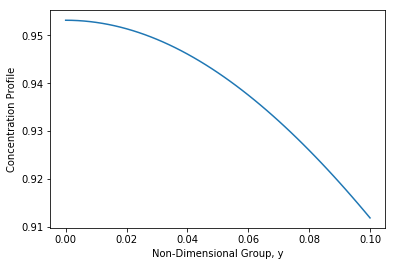

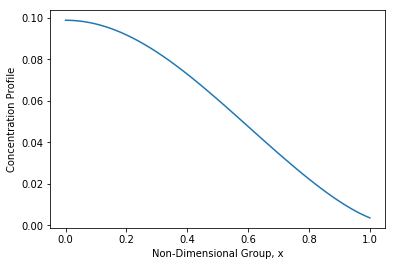

In [5]:
#This cell is used for graphing, using the Gz_n function and the An integration constant

m = 11 #number of eigenvalues

#Set x = 0.5, r/R = 0.5:
y = np.linspace(0, 0.1, num = 51)
conc_final_y = 0

for i in range(0,m):
    conc_step_y = an[i] * Gz_terms(5, 0.5, i) * np.exp(-1*lambda_n[i] * y**2)
    conc_final_y += conc_step_y
    
plt.plot(y, conc_final_y)
plt.xlabel("Non-Dimensional Group, y")
plt.ylabel("Concentration Profile")
plt.show()


#Set y = 1, (Dz/vR**2) = 1
x = np.linspace(0, 1, num = 51)
conc_final_x = 0


for i in range(0,m):
    conc_step_x = an[i] * Gz_terms(5, x, i) * np.exp(-1*lambda_n[i] * 1**2)
    conc_final_x += conc_step_x

plt.plot(x, conc_final_x)
plt.xlabel("Non-Dimensional Group, x")
plt.ylabel("Concentration Profile")
plt.show()




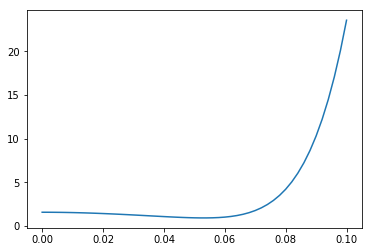

In [22]:
#3D Graph

import mpl_toolkits.mplot3d.axes3d as p3
import pylab as p

m = 11 #number of eigenvalues

y = np.linspace(0, 0.1, num = 51)
x = np.linspace(0, 1, num = 51)


conc_final = 0

for i in range(0, m):
    conc_step = an[i] * Gz_terms(5, x, i) * np.exp(-1*lambda_n[i] * y**2)
    conc_final += conc_step
    
    #print conc_final
        
#fig=p.figure()
#ax = p3.Axes3D(fig)        
#ax.plot_surface(x, y, conc_final)

In [48]:
trypConditionList = [(.1,5.386e-8,6.44e-4),(.5,5.386e-8,6.44e-4),(1,5.386e-8,6.44e-4)] #Concentration, Diffusivity, Permeability
#find and comment in units
radius = 2.5/2/100
length = 7.5
max_velocity = .0287/60
timestep = 20/3600
rings = 20
sections = 500

In [17]:
conc, D, _ = condition = trypConditionList[-1]

In [18]:
intset = np.zeros([500, 20])

In [19]:
intset[0] = conc
intset[0]

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.])